In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('happiness.csv')
df.head()

,Country,Score,Year,GDP per capita
0,Switzerland,7.587,2015,1.397
1,Iceland,7.561,2015,1.302
2,Denmark,7.527,2015,1.325
3,Norway,7.522,2015,1.459
4,Canada,7.427,2015,1.326


In [3]:
df.pivot_table(index='Country', columns='Year', values='Score')

Year,2015,2016,2017,2018,2019
Country,,,,,
Afghanistan,3.575,3.360,3.794,3.632,3.203
Albania,4.959,4.655,4.644,4.586,4.719
Algeria,5.605,6.355,5.872,5.295,5.211
Angola,4.033,3.866,3.795,3.795,NaN
Argentina,6.574,6.650,6.599,6.388,6.086
...,...,...,...,...,...
Venezuela,6.810,6.084,5.250,4.806,4.707
Vietnam,5.360,5.061,5.074,5.103,5.175
Yemen,4.077,3.724,3.593,3.355,3.380


In [4]:
df.pivot_table(index='Country', columns='Year', values='Score', margins=True)

Year,2015,2016,2017,2018,2019,All
Country,,,,,,
Afghanistan,3.575000,3.360000,3.794000,3.632000,3.203000,3.512800
Albania,4.959000,4.655000,4.644000,4.586000,4.719000,4.712600
Algeria,5.605000,6.355000,5.872000,5.295000,5.211000,5.667600
Angola,4.033000,3.866000,3.795000,3.795000,NaN,3.872250
Argentina,6.574000,6.650000,6.599000,6.388000,6.086000,6.459400
...,...,...,...,...,...,...
Vietnam,5.360000,5.061000,5.074000,5.103000,5.175000,5.154600
Yemen,4.077000,3.724000,3.593000,3.355000,3.380000,3.625800
Zambia,5.129000,4.795000,4.514000,4.377000,4.107000,4.584400


In [5]:
df.pivot_table(index='Country', columns='Year', values='Score', margins=True,
              aggfunc=np.sum, margins_name='SumOfAll')

Year,2015,2016,2017,2018,2019,SumOfAll
Country,,,,,,
Afghanistan,3.575,3.360,3.794,3.632,3.203,17.564
Albania,4.959,4.655,4.644,4.586,4.719,23.563
Algeria,5.605,6.355,5.872,5.295,5.211,28.338
Angola,4.033,3.866,3.795,3.795,NaN,15.489
Argentina,6.574,6.650,6.599,6.388,6.086,32.297
...,...,...,...,...,...,...
Vietnam,5.360,5.061,5.074,5.103,5.175,25.773
Yemen,4.077,3.724,3.593,3.355,3.380,18.129
Zambia,5.129,4.795,4.514,4.377,4.107,22.922


In [6]:
res = df.pivot_table(index='Country', values=['Score', 'GDP per capita'], margins=True,
               aggfunc=[np.mean, lambda x: np.mean(np.diff(x))])
res

e:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


mean                 <lambda>          
            GDP per capita     Score GDP per capita     Score
Country                                                      
Afghanistan       0.357000  3.512800       0.007500 -0.093000
Albania           0.938600  4.712600       0.017000 -0.060000
Algeria           1.013000  5.667600       0.015750 -0.098500
Angola            0.798250  3.872250      -0.009333 -0.079333
Argentina         1.111000  6.459400       0.009500 -0.122000
...                    ...       ...            ...       ...
Vietnam           0.723400  5.154600       0.027250 -0.046250
Yemen             0.489200  3.625800      -0.064750 -0.174250
Zambia            0.571600  4.584400       0.027000 -0.255500
Zimbabwe          0.344000  4.006600       0.023750 -0.236750
All               0.916041  5.379018      -0.001397 -0.006061

[171 rows x 4 columns]

In [7]:
df.pivot_table(index='Country', columns='Year', values=['Score', 'GDP per capita'], margins=True,
               aggfunc=[np.mean, np.median])

mean                                                    \
            GDP per capita                                                     
Year                  2015      2016      2017      2018      2019       All   
Country                                                                        
Afghanistan       0.320000  0.382000  0.401000  0.332000  0.350000  0.357000   
Albania           0.879000  0.955000  0.996000  0.916000  0.947000  0.938600   
Algeria           0.939000  1.053000  1.092000  0.979000  1.002000  1.013000   
Angola            0.758000  0.847000  0.858000  0.730000       NaN  0.798250   
Argentina         1.054000  1.151000  1.185000  1.073000  1.092000  1.111000   
...                    ...       ...       ...       ...       ...       ...   
Vietnam           0.632000  0.740000  0.789000  0.715000  0.741000  0.723400   
Yemen             0.546000  0.579000  0.592000  0.442000  0.287000  0.489200   
Zambia            0.470000  0.612000  0.636000  0.562000  0.578000  0.571600   
Zimbabwe          0.271000  0.350000  0.376000  0.357000  0.366000  0.344000   
All               0.846108  0.953879  0.984716  0.891449  0.905147  0.916041   

                                                     ...         median  \
                Score                                ... GDP per capita   
Year             2015      2016      2017      2018  ...           2017   
Country                                              ...                  
Afghanistan  3.575000  3.360000  3.794000  3.632000  ...          0.401   
Albania      4.959000  4.655000  4.644000  4.586000  ...          0.996   
Algeria      5.605000  6.355000  5.872000  5.295000  ...          1.092   
Angola       4.033000  3.866000  3.795000  3.795000  ...          0.858   
Argentina    6.574000  6.650000  6.599000  6.388000  ...          1.185   
...               ...       ...       ...       ...  ...            ...   
Vietnam      5.360000  5.061000  5.074000  5.103000  ...          0.789   
Yemen        4.077000  3.724000  3.593000  3.355000  ...          0.592   
Zambia       5.129000  4.795000  4.514000  4.377000  ...          0.636   
Zimbabwe     4.610000  4.193000  3.875000  3.692000  ...          0.376   
All          5.375734  5.382185  5.354019  5.375917  ...          1.065   

                                                                         \
                                     Score                                
Year           2018   2019     All    2015   2016   2017   2018    2019   
Country                                                                   
Afghanistan  0.3320  0.350  0.3500  3.5750  3.360  3.794  3.632  3.2030   
Albania      0.9160  0.947  0.9470  4.9590  4.655  4.644  4.586  4.7190   
Algeria      0.9790  1.002  1.0020  5.6050  6.355  5.872  5.295  5.2110   
Angola       0.7300    NaN  0.8025  4.0330  3.866  3.795  3.795     NaN   
Argentina    1.0730  1.092  1.0920  6.5740  6.650  6.599  6.388  6.0860   
...             ...    ...     ...     ...    ...    ...    ...     ...   
Vietnam      0.7150  0.741  0.7400  5.3600  5.061  5.074  5.103  5.1750   
Yemen        0.4420  0.287  0.5460  4.0770  3.724  3.593  3.355  3.3800   
Zambia       0.5620  0.578  0.5780  5.1290  4.795  4.514  4.377  4.1070   
Zimbabwe     0.3570  0.366  0.3570  4.6100  4.193  3.875  3.692  3.6630   
All          0.9495  0.960  0.9820  5.2325  5.314  5.279  5.378  5.3795   

                     
                     
Year            All  
Country              
Afghanistan  3.5750  
Albania      4.6550  
Algeria      5.6050  
Angola       3.8305  
Argentina    6.5740  
...             ...  
Vietnam      5.1030  
Yemen        3.5930  
Zambia       4.5140  
Zimbabwe     3.8750  
All          5.3220  

[171 rows x 24 columns]

In [8]:
res.columns = res.columns.set_levels(['mean_score', 'avg_improvment'], level=0)
res

mean_score           avg_improvment          
            GDP per capita     Score GDP per capita     Score
Country                                                      
Afghanistan       0.357000  3.512800       0.007500 -0.093000
Albania           0.938600  4.712600       0.017000 -0.060000
Algeria           1.013000  5.667600       0.015750 -0.098500
Angola            0.798250  3.872250      -0.009333 -0.079333
Argentina         1.111000  6.459400       0.009500 -0.122000
...                    ...       ...            ...       ...
Vietnam           0.723400  5.154600       0.027250 -0.046250
Yemen             0.489200  3.625800      -0.064750 -0.174250
Zambia            0.571600  4.584400       0.027000 -0.255500
Zimbabwe          0.344000  4.006600       0.023750 -0.236750
All               0.916041  5.379018      -0.001397 -0.006061

[171 rows x 4 columns]

In [9]:
res = res.dropna()
res = res.sort_values(('mean_score', 'Score'))
res

mean_score          avg_improvment          
                         GDP per capita    Score GDP per capita     Score
Country                                                                  
Burundi                         0.06240  3.07900       0.007750  0.217500
Central African Republic        0.03225  3.13425      -0.017667 -0.198333
Syria                           0.69900  3.29220      -0.011000  0.114000
South Sudan                     0.35850  3.38250      -0.029333 -0.326333
Rwanda                          0.32200  3.43860       0.034250 -0.032750
...                                 ...      ...            ...       ...
Iceland                         1.38660  7.51100       0.019500 -0.016750
Switzerland                     1.47220  7.51140       0.013750 -0.026750
Finland                         1.35700  7.53780       0.012500  0.090750
Norway                          1.51920  7.54100       0.007250  0.008000
Denmark                         1.39660  7.54600       0.014500  0.018250

[162 rows x 4 columns]

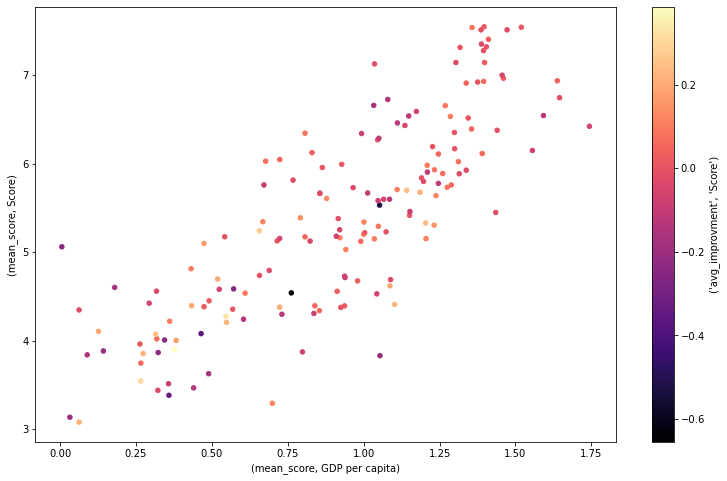

In [11]:
fig, ax = plt.subplots(figsize=(13, 8))
res.plot.scatter(('mean_score', 'GDP per capita'), ('mean_score', 'Score'), 
                 c=('avg_improvment', 'Score'), cmap='magma', ax=ax);

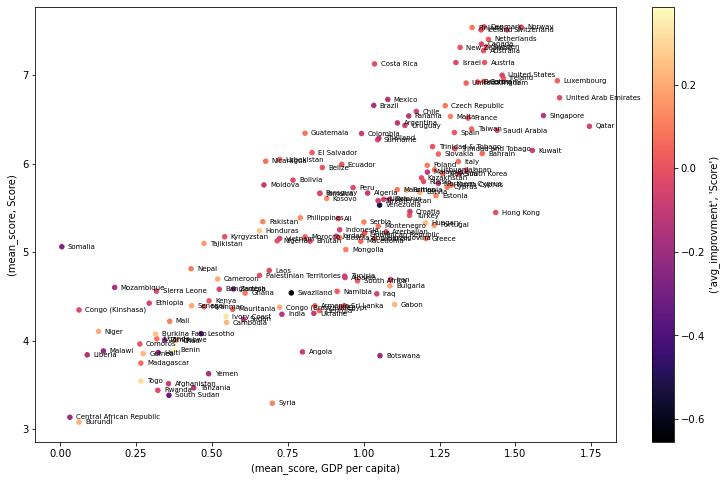

In [12]:
xs = res[('mean_score', 'GDP per capita')]
ys = res[('mean_score', 'Score')]
ls = res.index
for l, x, y in zip(ls, xs, ys):
    ax.text(x + 0.02, y, l, fontsize=7, va='center')
ax.get_figure()

## Postprocessing data

In [13]:
labels = [f'{i + 1} stars' for i in range(5)]
stars = pd.qcut(res[('mean_score', 'Score')], 5, labels=labels)
stars.value_counts()

1 stars    33
5 stars    33
2 stars    32
3 stars    32
4 stars    32
Name: (mean_score, Score), dtype: int64

In [14]:
res['TrivialisingHappiness'] = stars
res

mean_score          avg_improvment            \
                         GDP per capita    Score GDP per capita     Score   
Country                                                                     
Burundi                         0.06240  3.07900       0.007750  0.217500   
Central African Republic        0.03225  3.13425      -0.017667 -0.198333   
Syria                           0.69900  3.29220      -0.011000  0.114000   
South Sudan                     0.35850  3.38250      -0.029333 -0.326333   
Rwanda                          0.32200  3.43860       0.034250 -0.032750   
...                                 ...      ...            ...       ...   
Iceland                         1.38660  7.51100       0.019500 -0.016750   
Switzerland                     1.47220  7.51140       0.013750 -0.026750   
Finland                         1.35700  7.53780       0.012500  0.090750   
Norway                          1.51920  7.54100       0.007250  0.008000   
Denmark                         1.39660  7.54600       0.014500  0.018250   

                         TrivialisingHappiness  
                                                
Country                                         
Burundi                                1 stars  
Central African Republic               1 stars  
Syria                                  1 stars  
South Sudan                            1 stars  
Rwanda                                 1 stars  
...                                        ...  
Iceland                                5 stars  
Switzerland                            5 stars  
Finland                                5 stars  
Norway                                 5 stars  
Denmark                                5 stars  

[162 rows x 5 columns]

In [15]:
res.columns = res.columns.droplevel(level=1)
res

,mean_score,mean_score,avg_improvment,avg_improvment,TrivialisingHappiness
Country,,,,,
Burundi,0.06240,3.07900,0.007750,0.217500,1 stars
Central African Republic,0.03225,3.13425,-0.017667,-0.198333,1 stars
Syria,0.69900,3.29220,-0.011000,0.114000,1 stars
South Sudan,0.35850,3.38250,-0.029333,-0.326333,1 stars
Rwanda,0.32200,3.43860,0.034250,-0.032750,1 stars
...,...,...,...,...,...
Iceland,1.38660,7.51100,0.019500,-0.016750,5 stars
Switzerland,1.47220,7.51140,0.013750,-0.026750,5 stars
Finland,1.35700,7.53780,0.012500,0.090750,5 stars
